# Explore here

In [57]:
# Your code here
import pandas as pd 
totaldata=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
totaldata.head()


,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [58]:


# Convertir la columna 'date' a formato de fecha y hora
totaldata['date'] = pd.to_datetime(totaldata['date'])

# Extraer solo la parte de la fecha (sin la hora)
totaldata['date'] = totaldata['date'].dt.date
totaldata.set_index('date', inplace=True)
ts=totaldata['sales']
# Mostrar las primeras filas del DataFrame para verificar que la conversión fue exitosa
print(totaldata.head(31))

                 sales
date                  
2022-09-03   55.292157
2022-09-04   53.803211
2022-09-05   58.141693
2022-09-06   64.530899
2022-09-07   66.013633
2022-09-08   60.081865
2022-09-09   68.466704
2022-09-10   67.765106
2022-09-11   70.512261
2022-09-12   74.656453
2022-09-13   76.459528
2022-09-14   82.992958
2022-09-15   83.515990
2022-09-16   84.200641
2022-09-17   87.769946
2022-09-18   90.042119
2022-09-19   96.126073
2022-09-20   93.631101
2022-09-21   97.788518
2022-09-22   96.889768
2022-09-23   94.395825
2022-09-24  106.618390
2022-09-25  109.853583
2022-09-26  107.636519
2022-09-27  119.275017
2022-09-28  110.705396
2022-09-29  117.808508
2022-09-30  119.712421
2022-10-01  127.475050
2022-10-02  129.887528
2022-10-03  128.547034


In [59]:
#ts.set_index('date', inplace=True)

Paso 2: Construye y analiza la serie temporal
Construye la estructura de datos válida para la serie temporal, grafícala y, a continuación, analízala y responde a las siguientes preguntas:

¿Cuál es el tensor de la serie temporal?
¿Cuál es la tendencia?
¿Es estacionaria?
¿Existe variabilidad o presencia de ruido?

NOTA: Un tensor en una serie temporal es la unidad de tiempo mínima para la cuál hay datos. Puede ser cada segundo, minuto, hora, día, semana, mes...

Es Un mes

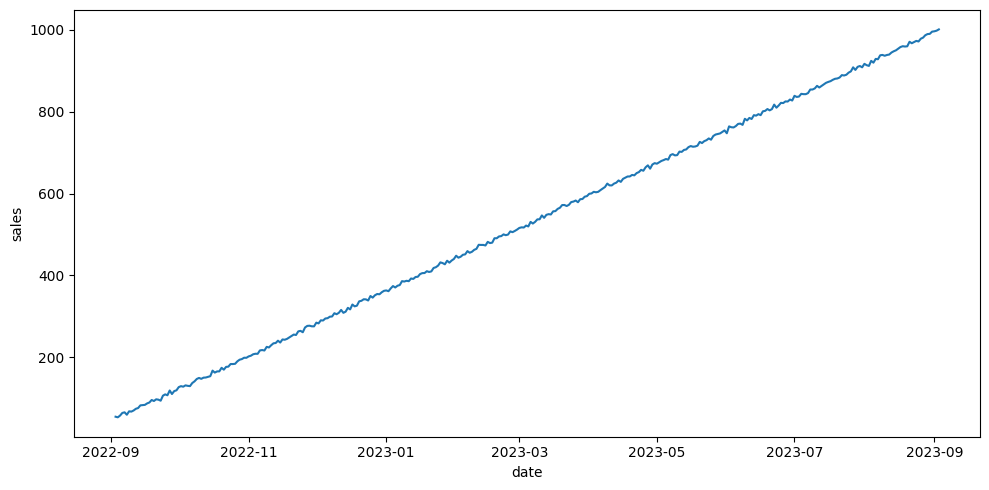

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

Descomposición de la serie


In [86]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, period = 12)
decomposition

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Realizar la descomposición estacional
decomposition = seasonal_decompose(ts, period=12)

# Obtener los componentes
tendencia = decomposition.trend
componente_estacional = decomposition.seasonal
residuales = decomposition.resid

# Mostrar los componentes
print("Tendencia:")
print(tendencia.head())

print("\nComponente Estacional:")
print(componente_estacional.head())

print("\nResiduales:")
print(residuales.head())

Tendencia:
date
2022-09-03   NaN
2022-09-04   NaN
2022-09-05   NaN
2022-09-06   NaN
2022-09-07   NaN
Name: trend, dtype: float64

Componente Estacional:
date
2022-09-03    0.572361
2022-09-04    0.150694
2022-09-05   -0.139793
2022-09-06    0.362303
2022-09-07    0.450234
Name: seasonal, dtype: float64

Residuales:
date
2022-09-03   NaN
2022-09-04   NaN
2022-09-05   NaN
2022-09-06   NaN
2022-09-07   NaN
Name: resid, dtype: float64


Análisis de la tendencia

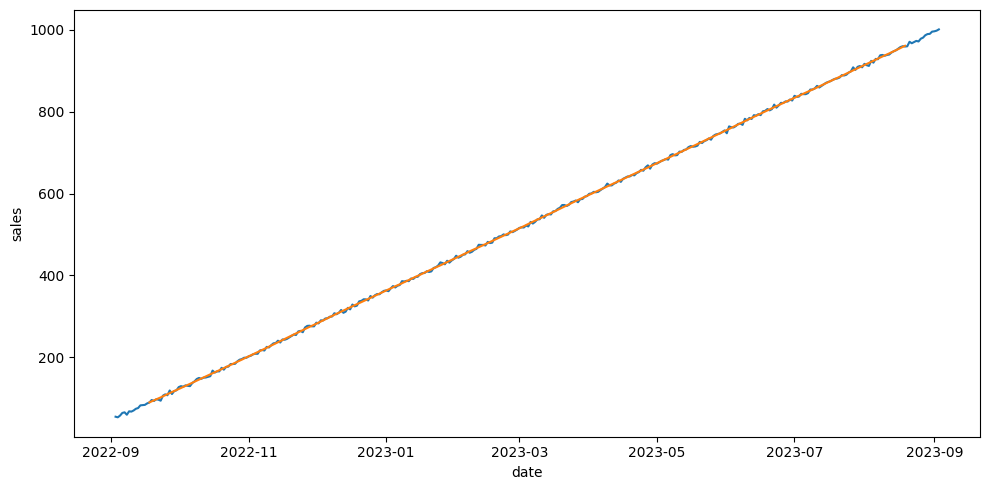

In [70]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

Análisis de la estacionalidad


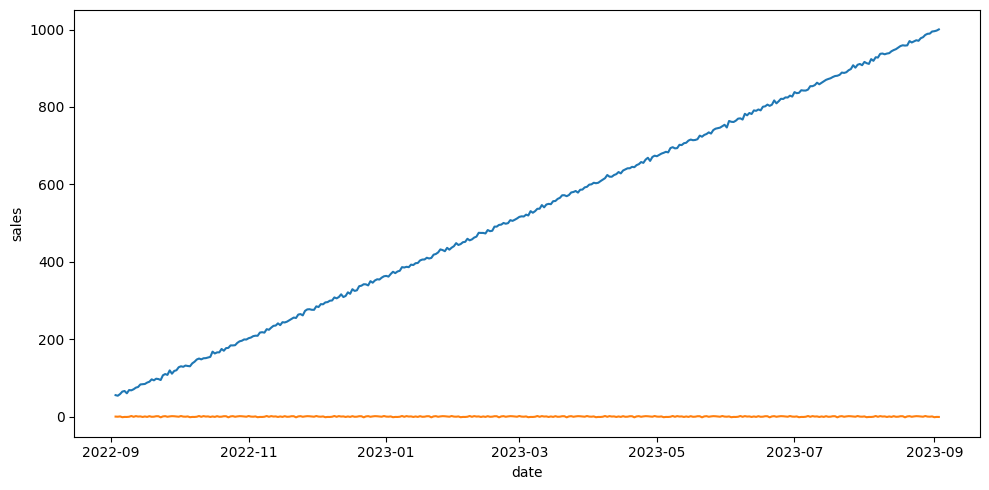

In [71]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

no hay estacionalidad

In [72]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

En este caso, el valor p es alto (0.986190), lo que sugiere que no hay suficiente evidencia para rechazar la hipótesis nula de no estacionariedad.

podrían ser no estacionarios.

Análisis de la variabilidad

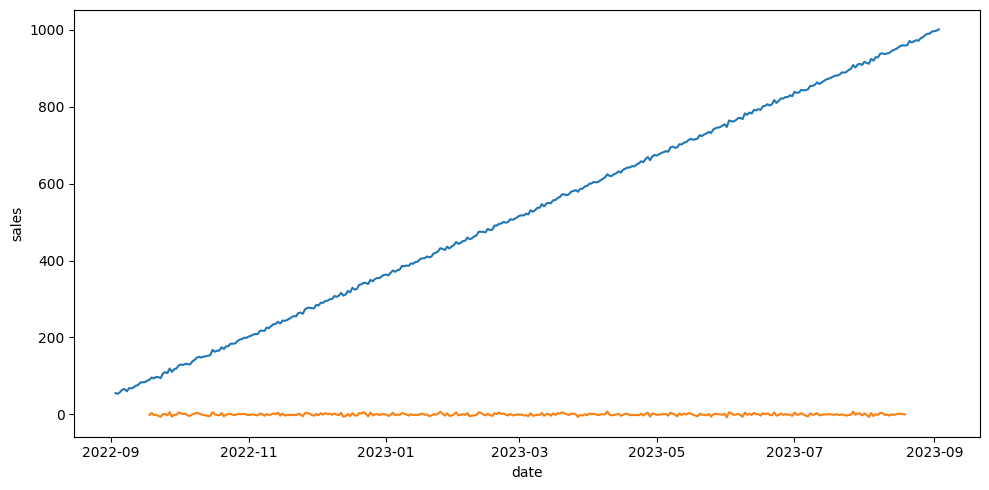

In [73]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

no hay variabilidad

Análisis de la autocorrelación

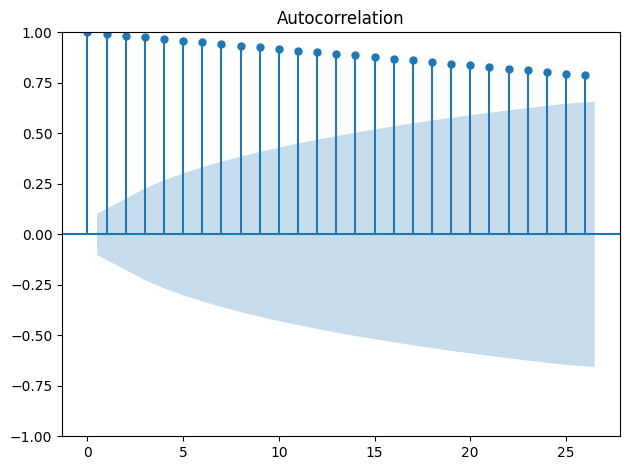

In [74]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts)

plt.tight_layout()

plt.show()

se aprecia una alta correlacion entre puntos

Paso 3: Entrenamiento del modelo

In [75]:
ts_stationary = ts.diff().dropna()

test_stationarity(ts_stationary)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [88]:
from pmdarima import auto_arima

model = auto_arima(ts_stationary, seasonal = True, trace = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1847.120, Time=1.99 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1972.854, Time=0.16 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2209.657, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1845.127, Time=0.98 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=1843.049, Time=0.40 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=1845.092, Time=1.46 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=1843.587, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1841.533, Time=0.65 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=1843.434, Time=1.75 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=1843.433, Time=1.20 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1839.553, Time=0.21 sec
 ARIMA(1,0,1)(1,0,0)[12] inte

In [89]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -915.776
Date:                Wed, 24 Apr 2024   AIC                           1839.553
Time:                        19:36:26   BIC                           1855.152
Sample:                    09-04-2022   HQIC                          1845.752
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Paso 3: Predicción del modelo


In [90]:
forecast = model.predict(60)
forecast

2023-09-04    1.675366
2023-09-05    2.673520
2023-09-06    2.591621
2023-09-07    2.598341
2023-09-08    2.597789
2023-09-09    2.597834
2023-09-10    2.597831
2023-09-11    2.597831
2023-09-12    2.597831
2023-09-13    2.597831
2023-09-14    2.597831
2023-09-15    2.597831
2023-09-16    2.597831
2023-09-17    2.597831
2023-09-18    2.597831
2023-09-19    2.597831
2023-09-20    2.597831
2023-09-21    2.597831
2023-09-22    2.597831
2023-09-23    2.597831
2023-09-24    2.597831
2023-09-25    2.597831
2023-09-26    2.597831
2023-09-27    2.597831
2023-09-28    2.597831
2023-09-29    2.597831
2023-09-30    2.597831
2023-10-01    2.597831
2023-10-02    2.597831
2023-10-03    2.597831
2023-10-04    2.597831
2023-10-05    2.597831
2023-10-06    2.597831
2023-10-07    2.597831
2023-10-08    2.597831
2023-10-09    2.597831
2023-10-10    2.597831
2023-10-11    2.597831
2023-10-12    2.597831
2023-10-13    2.597831
2023-10-14    2.597831
2023-10-15    2.597831
2023-10-16    2.597831
2023-10-17 

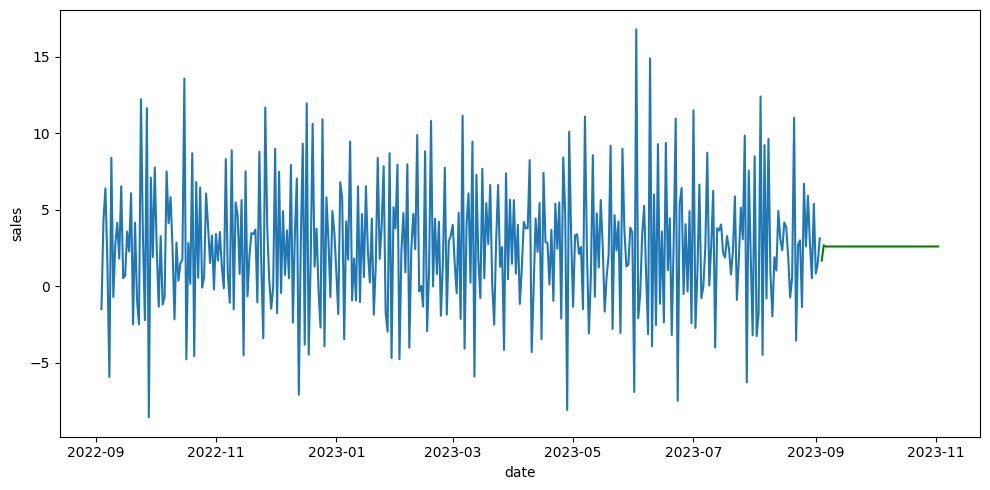

In [92]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_stationary)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()

In [93]:
from pickle import dump

dump(model, open("../models/model-1.0.sav", "wb"))
